This notebook presents codes used to generate plots in paper "Provable optimal transport with transformers: The essence of depth and prompt engineering" by Hadi Daneshmand. If you have questions, please reach out to hdanesh [at] mit [dot] edu

In [ ]:
!pip install POT #(run this line to install required POT library)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 37.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Experimental validations for Theorem 1 and 2

Here, we implement experiments in the section 6.1  of the paper



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.02626243 0.12332474 0.25010717 0.37497089 0.49998431 0.62484804
 0.75163046 0.84869278 0.43749965]
[0.25  0.125 0.625 0.5   0.375 0.75  0.    0.875]
[0 1 2 3 4 5 6 7]


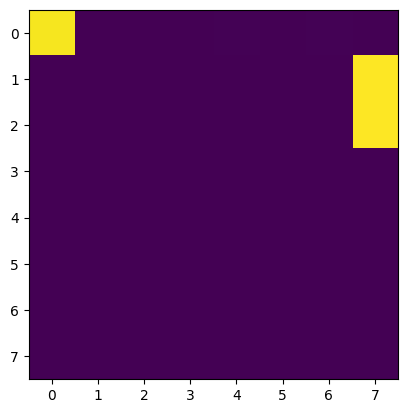

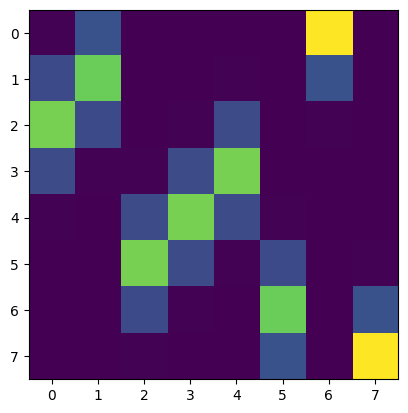

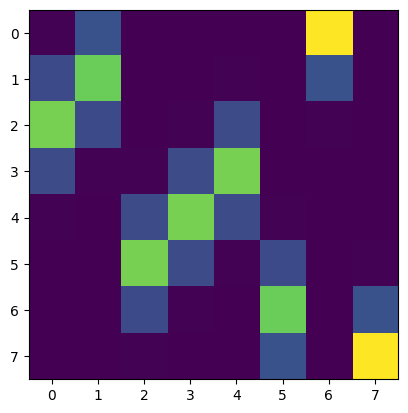

In [ ]:
# optimal transport with attention layers
from matplotlib import pyplot as plt
n = 8
x = np.random.permutation(n)/float(n)
y = []
for j in range(n):
  y.append(j)
y = np.asarray(y)
x = np.asarray(x)
Z = []
eta = 0.1
Z.append(np.r_[x**2,0])
Z.append(np.r_[x,0])
Z.append(np.r_[y**2,0])
Z.append(np.r_[y,0])
for i in range(3):
  Z.append(np.r_[np.ones(n),0])
Z.append(np.r_[np.ones(n),-1/n])
u = np.random.randn(n)
v = np.random.rand(n)
Z.append(np.r_[u,0])
Z.append(np.r_[v,0])
Z.append(np.r_[np.zeros(n),0])
Z = np.asarray(Z)
Z = Z.T
mp = 11
Q = np.zeros((mp,mp))
Q[4,2] = -1
Q[1,3] = 2
Q[0,4] = -1
Q[8,5] = 1
Q[5,6] = -1*float(eta)
Q[6,9] = 1
Q = Q/eta

P = np.zeros((mp,mp))
P[7,8] = 1


### Unit Test 1 (Passed) checking whether the transformer can construct the exp matrix
# A = Z @ Q @ Z.T
# M = A[0:n,0:n]
# onev = np.ones(n)
# A = np.outer(u,onev)
# B = np.outer(onev,v)
# Delta = A + B
# C = np.zeros((n,n))
# for i in range(n):
#   for j in range(n):
#     C[i,j] = (x[i]-y[j])**2
# M2 = (-C + Delta)/eta - 1
# np.linalg.norm(M2-M)

def atten(Z,Q,P):
  A = Z @ Q @ Z.T
  M = np.exp(A)
  sums = np.sum(M,axis=1)
  M = (M.T/sums).T
  return M @ Z @ P

def atten_last(Z,Q):
  A = Z @ Q @ Z.T
  n = Z.shape[0]-1
  B = np.zeros((n+1,n+1))
  B[:,n] = -np.Inf
  # B[n,:] = -np.Inf
  M = np.exp(A+B)
  sums = np.sum(M,axis=1)+0.0000001
  M = (M.T/sums).T
  P = np.zeros((mp,mp))
  P[1,10] = 1
  return M[0:n,0:n], M @ Z @ P
# ### Unit Test 2 (Passed) checking whether one head implements updates for u
#onev = np.ones(n)
# A1 = np.outer(u,onev)
# B1 = np.outer(onev,v)
# Delta = A1 + B1
# C = np.zeros((n,n))
# for i in range(n):
#   for j in range(n):
#     C[i,j] = (x[i]-y[j])**2
# M2 = (-C + Delta)/eta - 1
# M1 = -C + Delta
# X = np.exp(M1/eta-1)
# norms = np.sum(X,axis=1) + 1
# D = np.diag(1/norms)
# u1 = u - gamma*D @ (X @ onev-onev/n)
# print(Z1[:,8])
# print(u1)
# D @ X
Q2 = np.zeros((mp,mp))
Q2[4,0] = -1
Q2[3,1] = 2
Q2[2,4] = -1
Q2[9,5] = 1
Q2[5,6] = -1*eta
Q2[6,8] = 1
Q2 = Q2/eta
Z @ Q2
P2 = np.zeros((mp,mp))
P2[7,9] = 1
Z2 = atten(Z,Q2,P2)


# Unit Test 3 (Passed) check whether the transformer implements updates for v
# onev = np.ones(n)
# A1 = np.outer(u,onev)
# B1 = np.outer(onev,v)
# Delta = A1 + B1
# C = np.zeros((n,n))
# for i in range(n):
#   for j in range(n):
#     C[i,j] = (x[i]-y[j])**2
# M2 = (-C + Delta)/eta - 1
# M1 = -C + Delta
# X = np.exp(M1/eta-1)
# A = Z @ Q2 @ Z.T
# P = np.zeros((mp,mp))
# P[7,8] = 1
# M = np.exp(A)
# sums = np.sum(M,axis=1)
# M = (M.T/sums).T
# print(A)
# print(M1/eta-1)
# X = X.T
# norms = np.sum(X,axis=1) + 1
# D = np.diag(1/norms)
# v1 = v - gamma*D @ (X @ onev- onev/n)
# print(v1)
# print(Z2[:,9])
gamma = 0.05
T = 20001
for i in range(T):
  if i % 10000 == 0:
    plt.figure()
    attM, Z_last= atten_last(Z,Q2)
    plt.imshow(np.abs(attM))
    name = 'att%i.png' % i
    plt.savefig(name,bbox_inches='tight')
    files.download(name)
  Z = Z - gamma*atten(Z,Q,P)-gamma*atten(Z,Q2,P2)
print(Z_last[:,mp-1])
print(x)
print(y)

It.  |Err         
-------------------
    0|1.921690e+00|
   10|4.245388e-01|
   20|1.287874e-01|
   30|5.131708e-02|
   40|2.148951e-02|
   50|9.080398e-03|
   60|3.843145e-03|
   70|1.627027e-03|
   80|6.888513e-04|
   90|2.916488e-04|
  100|1.234797e-04|
  110|5.227948e-05|
  120|2.213435e-05|
  130|9.371356e-06|
  140|3.967693e-06|
  150|1.679862e-06|
  160|7.112287e-07|
  170|3.011237e-07|
  180|1.274913e-07|
  190|5.397792e-08|
It.  |Err         
-------------------
  200|2.285345e-08|
  210|9.675810e-09|
  220|4.096594e-09|
  230|1.734437e-09|


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

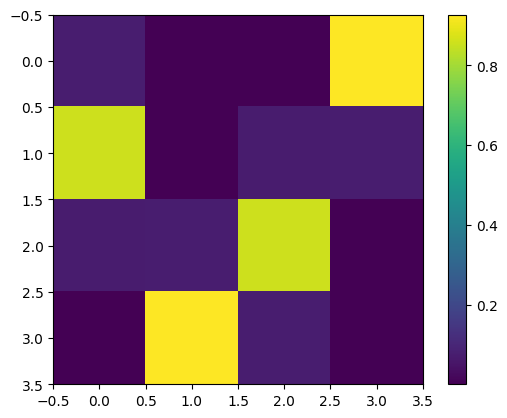

In [ ]:
# ploting the optimal transport map
import ot
a = np.ones(n)
b = np.ones(n)
M = ot.dist(x.reshape((n, 1)), y.reshape((n, 1)))
lambd = eta
Gs = ot.sinkhorn(a, b, M.T, lambd, verbose=True)
plt.figure()
plt.imshow(Gs)
plt.colorbar()
name = 'ot-optimal.png'
plt.savefig(fname=name,bbox_inches='tight')
files.download(name)

# Learning from data

Let $x_1,\dots, x_n$ are random permuation of $1/n,\dots, n/n$. We trained a transformer to sort this list. In partiular, we used the specific engineered prompt proposed in the paper. Check Section 6.2 for details on training.  

In [ ]:
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt

dtype =torch.cuda.FloatTensor
def generateZ(ss,n, eta=0.01):
  x = []
  y = []
  opt = []
  for i in range(ss):
    x0 = np.random.permutation(50)[0:n]/float(50)
    y0 = np.zeros(n)
    for j in range(n):
      y0[j] = j/float(n)
    x.append(x0)
    y.append(y0)
    opt.append(torch.tensor(sorted(x0)))
  tensor_opt = torch.stack(opt)
  y = np.asarray(y)
  x = np.asarray(x)
  Y = torch.tensor(y)
  X = torch.tensor(x)
  Zs = []
  out = torch.tensor(y0)
  for j in range(ss):
    x = X[j,:]
    y = Y[j,:]
    Z = []
    Z.append(np.r_[x**2,0])
    Z.append(np.r_[x,0])
    Z.append(np.r_[y**2,0])
    Z.append(np.r_[y,0])
    for i in range(3):
      Z.append(np.r_[np.ones(n),0])
    Z.append(np.r_[np.ones(n),-1/n])
    u = np.random.randn(n)
    v = np.random.rand(n)
    Z.append(np.r_[u,0])
    Z.append(np.r_[v,0])
    Z.append(np.r_[np.zeros(n),0])
    Z = np.asarray(Z)
    Z = torch.tensor(Z).type(dtype)
    Z = Z.T
    Zs.append(Z)
  return torch.stack(Zs), tensor_opt.type(dtype)

def get_params(mp,optim = True):
  params = []
  params_np = []
  if optim:
    Q = np.zeros((mp,mp))
    Q[4,2] = -1
    Q[1,3] = 2
    Q[0,4] = -1
    Q[8,5] = 1
    Q[5,6] = -1*float(eta)
    Q[6,9] = 1
    Q = Q/eta
  else:
    Q = np.random.randn(mp,mp)/np.sqrt(mp)
  params_np.append(Q)
  Q =  Variable(torch.tensor(Q).type(dtype),requires_grad = True)
  params.append(Q)
  if optim:
    P = np.zeros((mp,mp))
    P[7,8] = 1
  else:
    P = np.random.randn(mp,mp)/np.sqrt(mp)
    # P = np.zeros((mp,mp))
    # P[7,8] = 1
  params_np.append(P)
  P = Variable(torch.tensor(P).type(dtype),requires_grad = True)
  params.append(P)
  if optim:
    Q2 = np.zeros((mp,mp))
    Q2[4,0] = -1
    Q2[3,1] = 2
    Q2[2,4] = -1
    Q2[9,5] = 1
    Q2[5,6] = -1*eta
    Q2[6,8] = 1
    Q2 = Q2/eta
  else:
    Q2 = np.random.randn(mp,mp)/np.sqrt(mp)
  params_np.append(Q2)
  Q2 = Variable(torch.tensor(Q2).type(dtype),requires_grad = True)
  params.append(Q2)
  if optim:
    P2 = np.zeros((mp,mp))
    P2[7,9] = 1
  else:
    P2 = np.random.randn(mp,mp)/np.sqrt(mp)
    # P2 = np.zeros((mp,mp))
    # P2[7,9] = 1
  params_np.append(P2)
  P2 = Variable(torch.tensor(P2).type(dtype),requires_grad = True)
  params.append(P2)
  return params,params_np


def atten_tr(Z, Q,P):
  A = torch.einsum('nij,jk,nmk->nim',(Z, Q,Z))
  M = torch.exp(A)
  M = torch.nn.functional.normalize(M,dim=2,p=1)
  return  torch.einsum('nij,njk,km->nim',(M,Z,P))

def atten_last_tr(Z_tr,params,mp):
  A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[0],Z_tr))
  n = Z_tr.size(1)-1
  ss = Z_tr.size(0)
  B = np.zeros((ss,n+1,n+1))
  B[:,:,n] = float('-inf')
  M = torch.exp(A+torch.tensor(B).type(dtype))
  mp = Z_tr.size(2)
  P = np.zeros((mp,mp))
  P[1,mp-1] = 1.0
  P = torch.tensor(P).type(dtype)
  M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
  return torch.einsum('nij,njk,km->nim',(M,Z_tr,P))

def optimize(layers,generateZ,optim,n,mp, lr=0.001,gamma=0.1,T= 10000,ss=500):
  nlay = len(layers)-1
  param = [] # the list of parameters
  for i in range(nlay+1):
    param = param + layers[i]#[layers[i][0]]
    param = param + layers[i]#[layers[i][2]]
  Z_tr,tensor_opt = generateZ(ss,n)
  for i in range(T):
    Z0 = Z_tr.clone()
    for j in range(nlay-1):
      A1 = atten_tr(Z0,layers[j][0],layers[j][1])
      A2 = atten_tr(Z0,layers[j][2],layers[j][3])
      Z0 = Z0 - gamma*A1 - gamma*A2
    Z0 = atten_last_tr(Z0,layers[nlay],mp)
    loss = torch.mean(torch.square(Z0[:,0:n,mp-1]-tensor_opt))
    if i % 50 ==0:
      Z_tr,tensor_opt = generateZ(ss,n)
    if i % 1000 ==0:
      print(i,loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()
  return layers

def compute_loss(layers,n,mp,Z,tensor_opt,gamma):
  nlay = len(layers)-1
  Z0 = Z.clone()
  for j in range(nlay-1):
    Q0 = layers[j][0]
    P0 = layers[j][1]
    Q1 = layers[j][2]
    P1 = layers[j][3]
    A1 = atten_tr(Z0,Q0,P0)
    A2 = atten_tr(Z0,Q1,P1)
    Z0 = Z0 - gamma*A1 - gamma*A2
  Z0 = atten_last_tr(Z0,layers[nlay],mp)
  loss = torch.mean(torch.square(Z0[:,0:n,mp-1]-tensor_opt))
  return loss

In [ ]:
# Unit Test 4 (Passed) for attentions
# mp = 11
# params, params_np = get_params(mp)
# ## atten_last ##
# # A = Z @ Q @ Z.T
# # B = np.zeros((n+1,n+1))
# # B[:,n] = -np.Inf
# # # B[n,:] = -np.Inf
# # M = np.exp(A+B)
# # sums = np.sum(M,axis=1)
# # M = (M.T/sums).T
# # P = np.zeros((mp,mp))
# # P[1,10] = 1
# # M @ Z @ P
# Z_tr = torch.stack(Zs)
# A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[0],Z_tr))
# B = np.zeros((ss,n+1,n+1))
# B[:,:,n] = float('-inf')
# M = torch.exp(A+torch.tensor(B))
# # B[n,:] = -np.Inf
# P = np.zeros((mp,mp))
# P[1,10] = 1.0
# P = torch.tensor(P)
# M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
# out = torch.einsum('nij,njk,km->nim',(M,Z_tr,P))

# ind = 5
# Z = Zs[ind].detach().numpy()

# A = Z @ Q @ Z.T
# B = np.zeros((n+1,n+1))
# B[:,n] = -np.Inf
# # B[n,:] = -np.Inf
# M2 = np.exp(A+B)
# sums = np.sum(M2,axis=1)
# M2 = (M2.T/sums).T
# np.linalg.norm(M[ind,:,:].detach().numpy()-M2)
# _,out2 = atten_last(Z,params_np[0])
# out1 = out[ind,:,:].detach().numpy()
# np.linalg.norm(out1-out2)


In [ ]:
# making attention layers
n = 7
mp = 11
layers = []
nlay = 20
for i in range(nlay+1):
  params, params_np = get_params(mp,optim = False)
  layers.append(params)


# collecting all the parameters in a list
param = [] # the list of parameters
for i in range(nlay+1):
  param = param + layers[i]#[layers[i][0]]
  param = param + layers[i]#[layers[i][2]]
# optimization method
lr = 0.001
optim = torch.optim.Adam(param,lr=lr )

T = 10000
gamma = 0.05
ss  = 500

layers = optimize(layers,generateZ,optim,n,mp,lr,gamma,T,ss)


/usr/local/lib/python3.10/dist-packages/torch/_compile.py:31: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return disable_fn(*args, **kwargs)


0 0.09759419411420822
1000 0.0010869125835597515
2000 0.000409723783377558
3000 0.0002702677738852799
4000 0.00018626921519171447
5000 0.0002748506667558104
6000 0.00013644633872900158
7000 0.00011831961455754936
8000 9.303656406700611e-05
9000 0.00011440853995736688


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

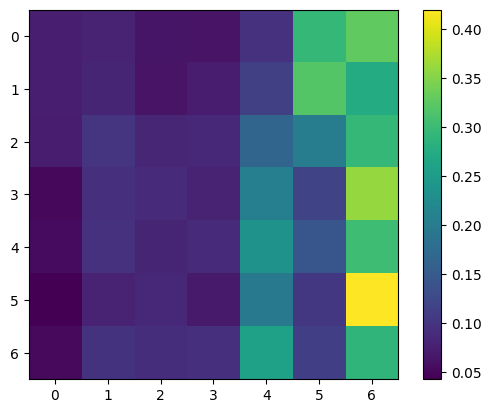

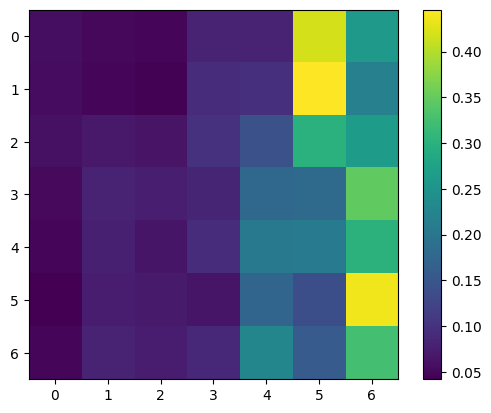

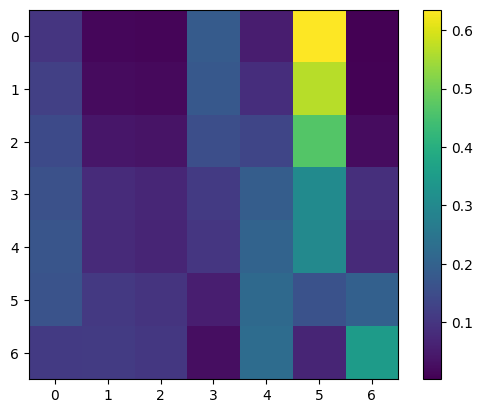

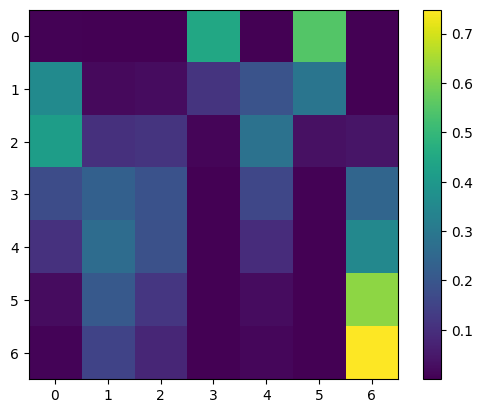

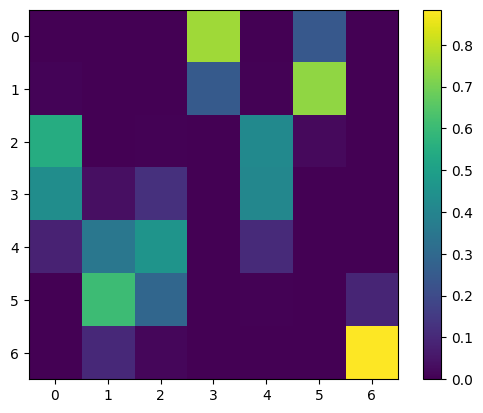

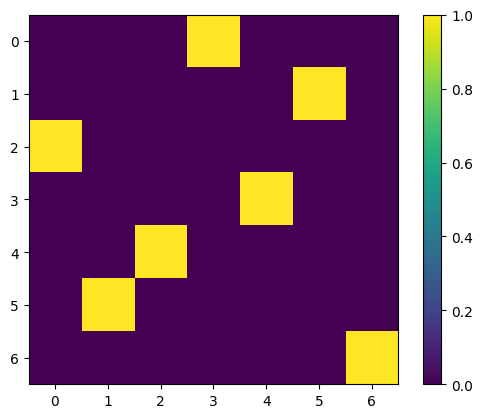

In [ ]:
from google.colab import files
n = 7
Z_tr,tensor_opt = generateZ(1,n)
def atten_pattern_tr(Z_tr,params,ind=0):
  A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[ind],Z_tr))
  n = Z_tr.size(1)-1
  ss = Z_tr.size(0)
  B = np.zeros((ss,n+1,n+1))
  B[:,:,n] = float('-inf')
  M = torch.exp(A+torch.tensor(B).type(dtype))
  mp = Z_tr.size(2)
  P = np.zeros((mp,mp))
  P[1,10] = 1.0
  P = torch.tensor(P)
  M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
  return M

Z0 = Z_tr.clone()
for j in range(nlay-1):
  ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  Q0 = layers[j][0]
  P0 = layers[j][1]
  Q1 = layers[j][2]
  P1 = layers[j][3]
  A1 = atten_tr(Z0,Q0,P0)
  A2 = atten_tr(Z0,Q1,P1)
  Z0 = Z0 - gamma*A1 - gamma*A2
  if j % 5 == 0:
    plt.figure()
    plt.imshow(ptr.cpu().detach().numpy())
    plt.colorbar()
    name = 'att%d.pdf' % j
    plt.savefig(name,format='pdf',bbox_inches='tight')
    files.download(name)
ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
plt.figure()
plt.imshow(ptr.cpu().detach().numpy())
plt.colorbar()
name = 'att_last.pdf'
plt.savefig(name,format='pdf',bbox_inches='tight')
files.download(name)

x0 = Z_tr[0,0:n,1].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.figure()
plt.imshow(P)
plt.colorbar()
name = 'ground.pdf'
plt.savefig(name,format='pdf',bbox_inches='tight')
files.download(name)

It.  |Err         
-------------------
    0|4.060417e+00|
   10|5.032227e-01|
   20|1.199879e-01|
   30|3.629880e-02|
   40|1.129609e-02|
   50|3.523403e-03|
   60|1.099066e-03|
   70|3.428204e-04|
   80|1.069303e-04|
   90|3.335280e-05|
  100|1.040310e-05|
  110|3.244836e-06|
  120|1.012099e-06|
  130|3.156841e-07|
  140|9.846519e-08|
  150|3.071233e-08|
  160|9.579496e-09|
  170|2.987945e-09|


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

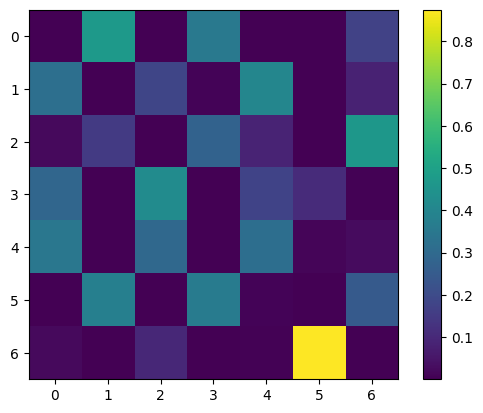

In [ ]:
# ploting the optimal transport map
import ot
a = np.ones(n)
b = np.ones(n)
x = Z0[0,0:7,1].cpu().detach().numpy()
y = Z0[0,0:7,3].cpu().detach().numpy()
M = ot.dist(x.reshape((n, 1)), y.reshape((n, 1)))
lambd = 0.1
Gs = ot.sinkhorn(a, b, M.T, lambd, verbose=True)
plt.figure()
plt.imshow(Gs)
plt.colorbar()
name = 'ot-optimal.png'
plt.savefig(fname=name,bbox_inches='tight')
files.download(name)

In [ ]:
from google.colab import files
n = 9
Z_tr,tensor_opt = generateZ(1,n)
def atten_pattern_tr(Z_tr,params,ind=0):
  A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[ind],Z_tr))
  n = Z_tr.size(1)-1
  ss = Z_tr.size(0)
  B = np.zeros((ss,n+1,n+1))
  B[:,:,n] = float('-inf')
  M = torch.exp(A+torch.tensor(B).type(dtype))
  mp = Z_tr.size(2)
  P = np.zeros((mp,mp))
  P[1,10] = 1.0
  P = torch.tensor(P)
  M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
  return M

Z0 = Z_tr.clone()
for j in range(nlay-1):
  ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  Q0 = layers[j][0]
  P0 = layers[j][1]
  Q1 = layers[j][2]
  P1 = layers[j][3]
  A1 = atten_tr(Z0,Q0,P0)
  A2 = atten_tr(Z0,Q1,P1)
  Z0 = Z0 - gamma*A1 - gamma*A2
  if j % 5 == 0:
    plt.figure()
    plt.imshow(ptr.cpu().detach().numpy())
    plt.colorbar()
    name = 'att%d_9.pdf' % j
    plt.savefig(name,format='pdf',bbox_inches='tight')
    files.download(name)
ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  # if j % 1 == 0:
plt.figure()
plt.imshow(ptr.cpu().detach().numpy())
plt.colorbar()
name = 'att_last_9.pdf'
plt.savefig(name,format='pdf',bbox_inches='tight')
files.download(name)

x0 = Z_tr[0,0:n,1].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.figure()
plt.imshow(P)
plt.colorbar()
name = 'ground9.png'
plt.savefig(name,format='png',bbox_inches='tight')
files.download(name)

NameError: name 'generateZ' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

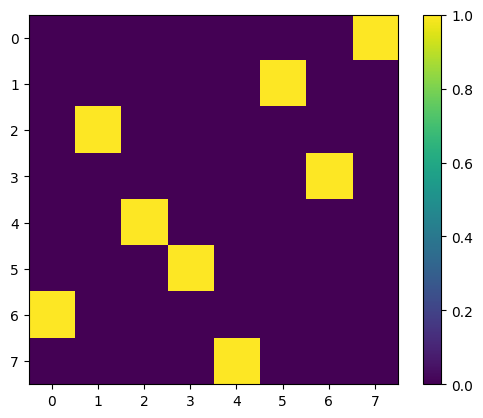

In [ ]:
x0 = Z_tr[0,0:n,1].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.figure()
plt.imshow(P)
plt.colorbar()
name = 'ground8.png'
plt.savefig(name,format='png',bbox_inches='tight')
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

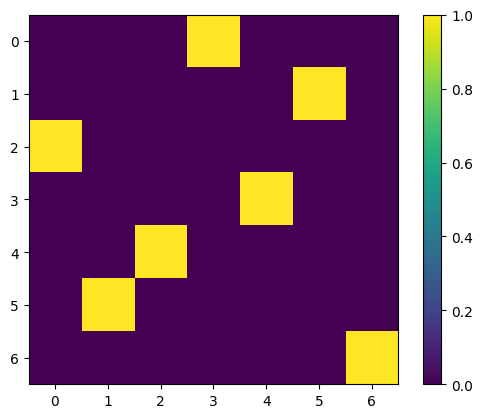

In [ ]:
x0 = Z_tr[0,0:n,1].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.close()
plt.figure()
plt.imshow(P)
plt.colorbar()

name = 'ground.png'
plt.savefig(name,format='png',bbox_inches='tight')
files.download(name)

In [ ]:
x0

array([0.0064    , 0.3136    , 0.16000001, 0.0784    , 0.6083999 ,
       0.        , 0.0324    ], dtype=float32)

# Prompt Engineering

In [ ]:
def get_truncated_Z(ss,n, eta=0.01):
  x = []
  y = []
  opt = []
  for i in range(ss):
    x0 = np.random.permutation(50)[0:n]/float(50)
    y0 = np.zeros(n)
    for j in range(n):
      y0[j] = j/float(n)
    x.append(x0)
    y.append(y0)
    opt.append(torch.tensor(sorted(x0)))
  tensor_opt = torch.stack(opt)
  y = np.asarray(y)
  x = np.asarray(x)
  Y = torch.tensor(y)
  X = torch.tensor(x)
  Zs = []
  out = torch.tensor(y0)
  for j in range(ss):
    x = X[j,:]
    y = Y[j,:]
    Z = []
    Z.append(x)
    Z.append(y)
    Z.append(np.zeros(n))
    Z = np.asarray(Z)
    Z = torch.tensor(Z).type(dtype)
    Z = Z.T
    Zs.append(Z)
  return torch.stack(Zs), tensor_opt.type(dtype)


In [ ]:
torch.manual_seed(63)
n = 7
mp = 3
layers = []
nlay = 20
for i in range(nlay+1):
  params, params_np = get_params(mp,optim = False)
  layers.append(params)

# collecting all the parameters in a list
param = [] # the list of parameters
for i in range(nlay+1):
  param = param + layers[i]#[layers[i][0]]
  param = param + layers[i]#[layers[i][2]]
# optimization method
lr = 0.001
optim = torch.optim.Adam(param,lr=lr )

T = 10000
gamma = 0.05
ss  = 500

layers = optimize(layers,get_truncated_Z,optim,n,mp,lr,gamma,T,ss)

/usr/local/lib/python3.10/dist-packages/torch/_compile.py:32: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return disable_fn(*args, **kwargs)


0 0.1726270318031311
1000 0.061138052493333817
2000 0.00576598197221756
3000 0.0049284156411886215
4000 0.004241284914314747
5000 0.004621595144271851
6000 0.004270385950803757
7000 0.00396521482616663
8000 0.0034785193856805563
9000 0.0028485064394772053


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

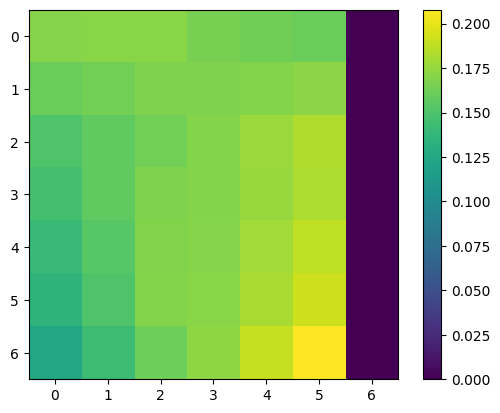

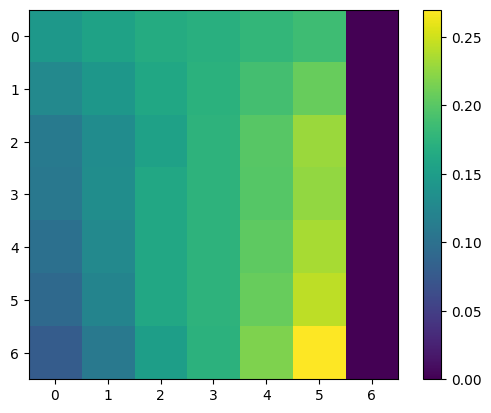

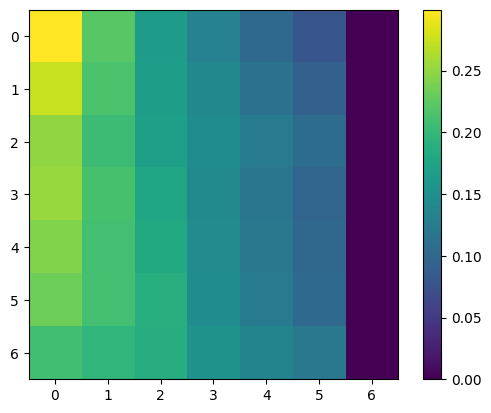

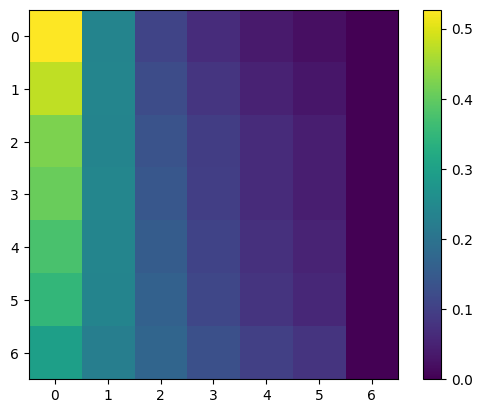

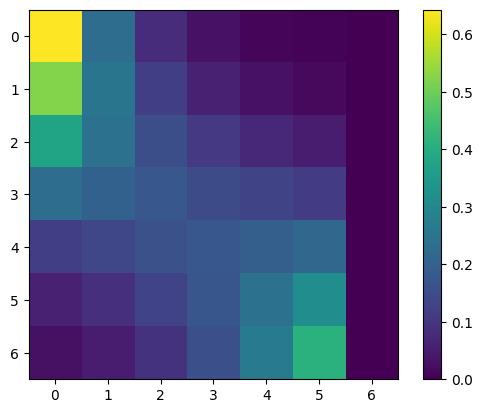

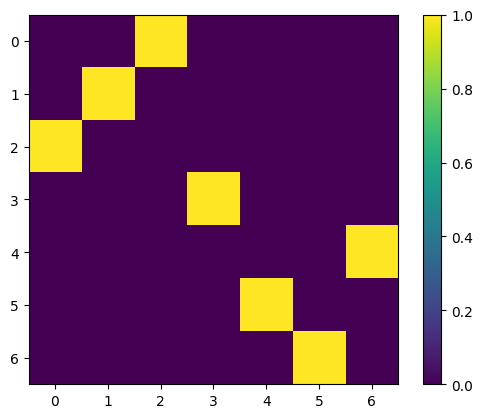

In [ ]:
from google.colab import files
n = 7
Z_tr,tensor_opt = get_truncated_Z(1,n)
def atten_pattern_tr(Z_tr,params,ind=0):
  A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[ind],Z_tr))
  n = Z_tr.size(1)-1
  ss = Z_tr.size(0)
  B = np.zeros((ss,n+1,n+1))
  B[:,:,n] = float('-inf')
  M = torch.exp(A+torch.tensor(B).type(dtype))
  mp = Z_tr.size(2)
  # P = np.zeros((mp,mp))
  # P[1,10] = 1.0
  # P = torch.tensor(P)
  M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
  return M
# nlay = 20
# for i in range(nlay+1):
#   params, params_np = get_params(mp,optim = True)
#   layers.append(params)
# Z_tr,tensor_opt = generateZ(1,n)
Z0 = Z_tr.clone()
for j in range(nlay-1):
  ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  Q0 = layers[j][0]
  P0 = layers[j][1]
  Q1 = layers[j][2]
  P1 = layers[j][3]
  A1 = atten_tr(Z0,Q0,P0)
  A2 = atten_tr(Z0,Q1,P1)
  Z0 = Z0 - gamma*A1 - gamma*A2
  if j % 5 == 0:
    plt.figure()
    plt.imshow(ptr.cpu().detach().numpy())
    plt.colorbar()
    name = 'att%d_7.pdf' % j
    plt.savefig(name,format='pdf',bbox_inches='tight')
    files.download(name)
ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  # if j % 1 == 0:
plt.figure()
plt.imshow(ptr.cpu().detach().numpy())
plt.colorbar()
name = 'att_last_7.pdf'
plt.savefig(name,format='pdf',bbox_inches='tight')
files.download(name)

x0 = Z_tr[0,0:n,0].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.figure()
plt.imshow(P)
plt.colorbar()
name = 'ground7.png'
plt.savefig(name,format='png',bbox_inches='tight')
files.download(name)

In [ ]:
# with prompt engineering
n = 7
mp = 11
layers = []
nlay = 20
for i in range(nlay+1):
  params, params_np = get_params(mp,optim = False)
  layers.append(params)


# collecting all the parameters in a list
param = [] # the list of parameters
for i in range(nlay+1):
  param = param + layers[i]#[layers[i][0]]
  param = param + layers[i]#[layers[i][2]]
# optimization method
lr = 0.0001
optim = torch.optim.Adam(param,lr=lr )

T = 10000
gamma = 0.05
ss  = 500

layers = optimize(layers,generateZ,optim,n,mp,lr,gamma,T,ss)


/usr/local/lib/python3.10/dist-packages/torch/_compile.py:32: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return disable_fn(*args, **kwargs)


0 0.16167424619197845
1000 0.025512458756566048
2000 0.011969669722020626
3000 0.007251075468957424
4000 0.005052809603512287
5000 0.003775590332224965
6000 0.0026525382418185472
7000 0.0017555495724081993
8000 0.0010460891062393785
9000 0.0006660950602963567


In [ ]:
def generateZ1(ss,n,xin, eta=0.01):
  x = []
  y = []
  opt = []
  for i in range(ss):
    x0 = xin
    y0 = np.zeros(n)
    for j in range(n):
      y0[j] = j/float(n)
    x.append(x0)
    y.append(y0)
    opt.append(torch.tensor(sorted(x0)))
  tensor_opt = torch.stack(opt)
  y = np.asarray(y)
  x = np.asarray(x)
  Y = torch.tensor(y)
  X = torch.tensor(x)
  Zs = []
  out = torch.tensor(y0)
  for j in range(ss):
    x = X[j,:]
    y = Y[j,:]
    Z = []
    Z.append(np.r_[x**2,0])
    Z.append(np.r_[x,0])
    Z.append(np.r_[y**2,0])
    Z.append(np.r_[y,0])
    for i in range(3):
      Z.append(np.r_[np.ones(n),0])
    Z.append(np.r_[np.ones(n),-1/n])
    u = np.random.randn(n)
    v = np.random.rand(n)
    Z.append(np.r_[u,0])
    Z.append(np.r_[v,0])
    Z.append(np.r_[np.zeros(n),0])
    Z = np.asarray(Z)
    Z = torch.tensor(Z).type(dtype)
    Z = Z.T
    Zs.append(Z)
  return torch.stack(Zs), tensor_opt.type(dtype)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

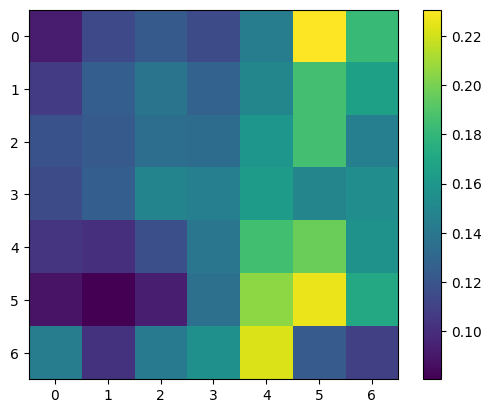

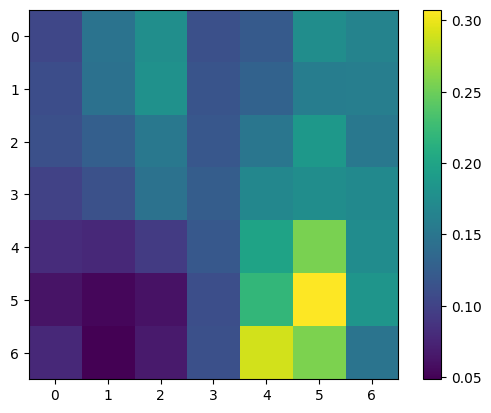

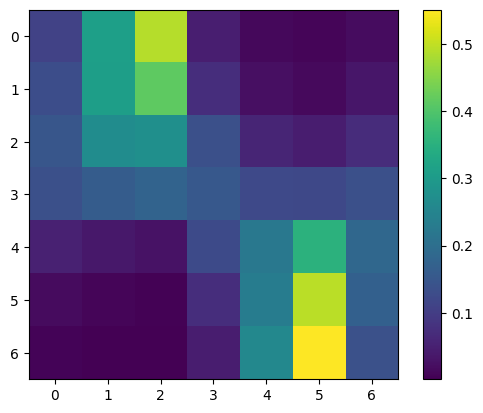

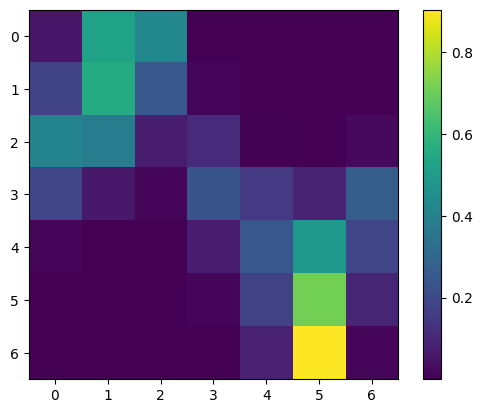

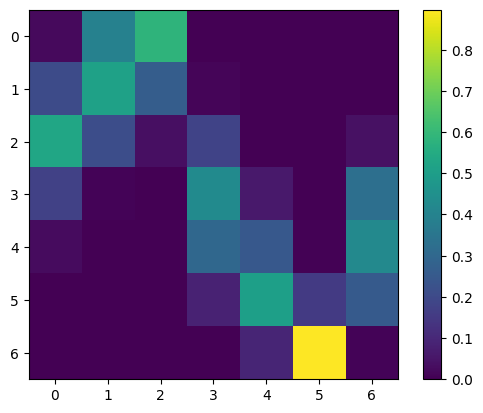

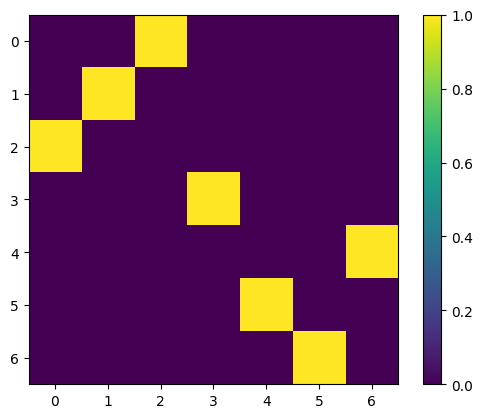

In [ ]:
from google.colab import files
n = 7
Z_tr,tensor_opt = generateZ1(1,n,x0)
def atten_pattern_tr(Z_tr,params,ind=0):
  A = torch.einsum('nij,jk,nmk->nim',(Z_tr, params[ind],Z_tr))
  n = Z_tr.size(1)-1
  ss = Z_tr.size(0)
  B = np.zeros((ss,n+1,n+1))
  B[:,:,n] = float('-inf')
  M = torch.exp(A+torch.tensor(B).type(dtype))
  mp = Z_tr.size(2)
  # P = np.zeros((mp,mp))
  # P[1,10] = 1.0
  # P = torch.tensor(P)
  M = torch.nn.functional.normalize(M,dim=2,p=1,eps=0)
  return M
# nlay = 20
# for i in range(nlay+1):
#   params, params_np = get_params(mp,optim = True)
#   layers.append(params)
# Z_tr,tensor_opt = generateZ(1,n)
Z0 = Z_tr.clone()
for j in range(nlay-1):
  ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  Q0 = layers[j][0]
  P0 = layers[j][1]
  Q1 = layers[j][2]
  P1 = layers[j][3]
  A1 = atten_tr(Z0,Q0,P0)
  A2 = atten_tr(Z0,Q1,P1)
  Z0 = Z0 - gamma*A1 - gamma*A2
  if j % 5 == 0:
    plt.figure()
    plt.imshow(ptr.cpu().detach().numpy())
    plt.colorbar()
    name = 'att%d_7_prompt.pdf' % j
    plt.savefig(name,format='pdf',bbox_inches='tight')
    files.download(name)
ptr = atten_pattern_tr(Z0,layers[nlay],ind=0)[0,0:n,0:n]
  # if j % 1 == 0:
plt.figure()
plt.imshow(ptr.cpu().detach().numpy())
plt.colorbar()
name = 'att_last_7_prompt.pdf'
plt.savefig(name,format='pdf',bbox_inches='tight')
files.download(name)

x0 = Z_tr[0,0:n,0].cpu().detach().numpy()
inds = np.argsort(x0)
P = np.zeros((n,n))
for i in range(n):
  P[i,inds[i]] = 1
plt.figure()
plt.imshow(P)
plt.colorbar()
name = 'ground7_prompt.png'
plt.savefig(name,format='png',bbox_inches='tight')
files.download(name)